In [57]:
import pandas as pd # import pandas which is high-performance, easy-to-use data structures and data analysis framework
import numpy as np # import numpy which is fundamental package for scientific computing with Python
%matplotlib inline
import matplotlib # importing plotting library for the Python programming language
import matplotlib.pyplot as plt 
import seaborn as sns # importing a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [58]:
train = pd.read_csv('../input/train.csv') # read train set and store it in a dataframe
test = pd.read_csv('../input/test.csv') # read train set and store it in a dataframe

In [59]:
#descriptive statistics summary
train['SalePrice'].describe() # obtaining descriptive statistics that summarize the house saleprice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [60]:
train.head() # displaying the first couple of rows for train set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
test.head() # displaying the first couple of rows for test set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [62]:
train.info() # displaying information of train set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [63]:
# Printing the dimensions of train set and test set 
print("The shape of train data before dropping Id feature is : {} ".format(train.shape))
print("The shape of test data before dropping Id feature is : {} ".format(test.shape))

# Saving the 'Id' column  
train_ID = train['Id']
test_ID = test['Id']

# Droping the 'Id' colum because it's unnecessary for  the prediction process
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Printing the dimensions of train set and test set again
print("\nThe shape of train data before after Id feature is : {} ".format(train.shape)) 
print("The shape of test data before after Id feature is : {} ".format(test.shape))

The shape of train data before dropping Id feature is : (1460, 81) 
The shape of test data before dropping Id feature is : (1459, 80) 

The shape of train data before after Id feature is : (1460, 80) 
The shape of test data before after Id feature is : (1459, 79) 


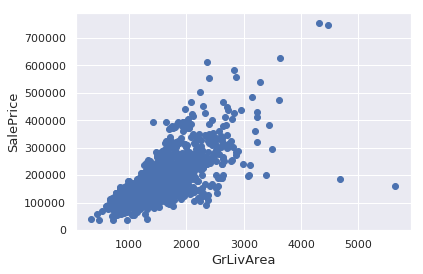

In [64]:
fig, ax = plt.subplots() # initialize plot and axes
ax.scatter(x = train['GrLivArea'], y = train['SalePrice']) # plotting scatter-plot between Ground Living Area and Sale Price
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

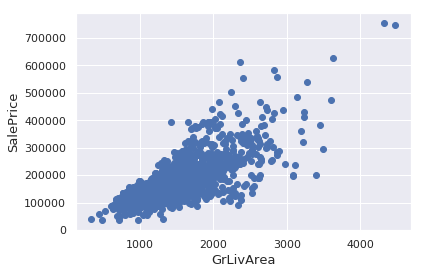

In [65]:
#Removing outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Checking the scatter-plot between Ground Living Area and Sale Price again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [66]:
# Printing the skewness and kurtosis of the distribution of SalePrice
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.881296
Kurtosis: 6.523067



 mu = 180932.92 and sigma = 79467.79



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


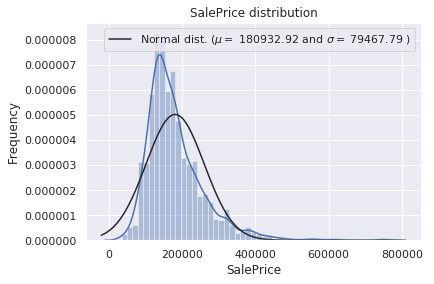

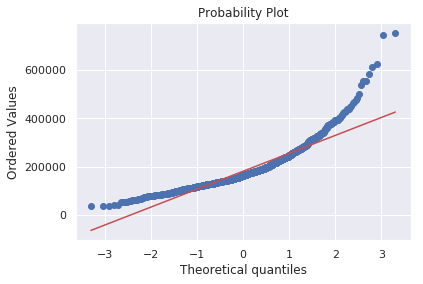

In [67]:
from scipy import stats # importing statistical module from Scipy which is a framework for scientific computing and technical computing
from scipy.stats import norm, skew # import functions for computing skew and norm from scipy stats module

sns.distplot(train['SalePrice'] , fit=norm); # plot a normal distribution of SalePrice

# Obtaining the mean and standard deviation of House SalePrice
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution of House SalePrice
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Obtaining also the Probability Plot of the SalePrice Distribution
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



 mu = 12.02 and sigma = 0.40



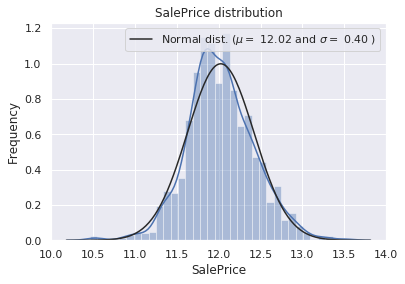

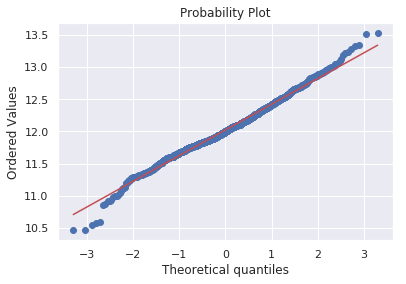

In [68]:
train["SalePrice"] = np.log1p(train["SalePrice"]) # computing the natural logarithm of House Sale Price i.e. log(1 + x) 

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm); # plot a normal distribution of SalePrice after applying natural logarithm

# Obtaining the mean and standard deviation of House SalePrice after applying natural logarithm
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Plotting the distribution of House SalePrice after applying natural logarithm
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Obtaining also the Probability Plot of the SalePrice Distribution after applying natural logarithm
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [69]:
ntrain = train.shape[0] # obtaining the number of examples of train set
ntest = test.shape[0] # obtaining the number of examples of test set
y_train = train.SalePrice.values # storing the Sale Price values in an array
# y_test = test.SalePrice.values 
all_data = pd.concat((train, test)).reset_index(drop=True) # concatenating train and test set data with indexes reset
all_data.drop(['SalePrice'], axis=1, inplace=True) # Dropping Sale Price from the concatenated data
print("all_data size is : {}".format(all_data.shape)) # Printing the dimensions of the concatenated data

all_data size is : (2917, 79)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [70]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100 # calculating for each feature the percentage of rows with null data from the concatenated data  
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30] # extracting the top 30 features with the highest % of null data by removing features with no null data and storing it in a list 
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na}) # converting the abobe list into a pandas dataframe
missing_data.head(20) # displaying the top 20 features with the highest % of null data

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5,1,'Percent missing data by feature')

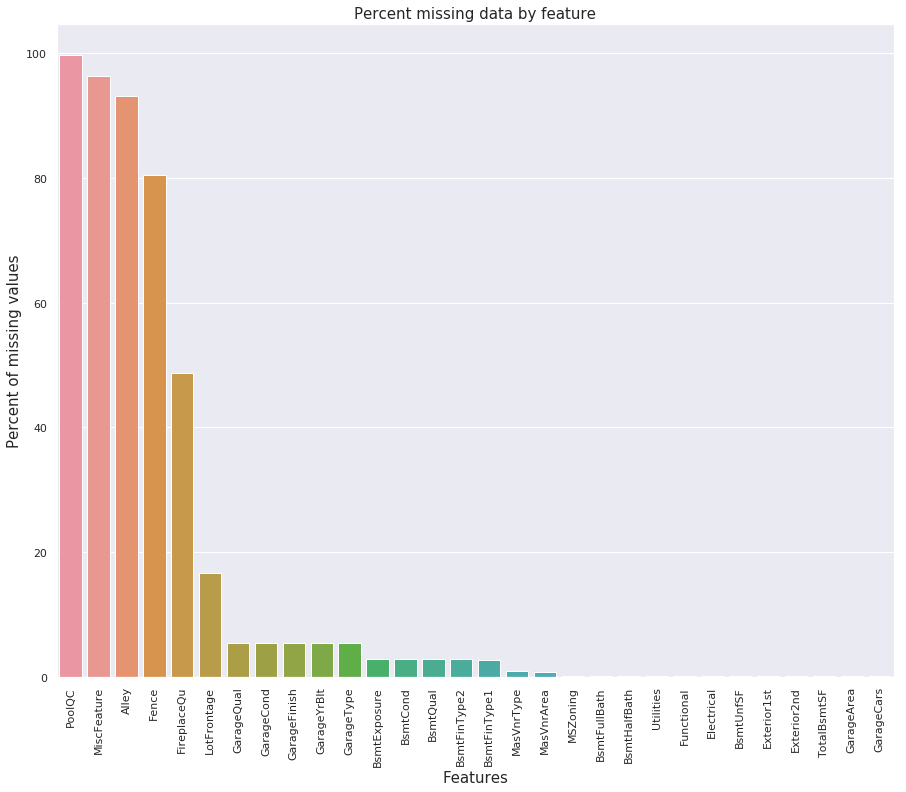

In [71]:
# Plotting percentage of missing data of the features from the concatenated dataset
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

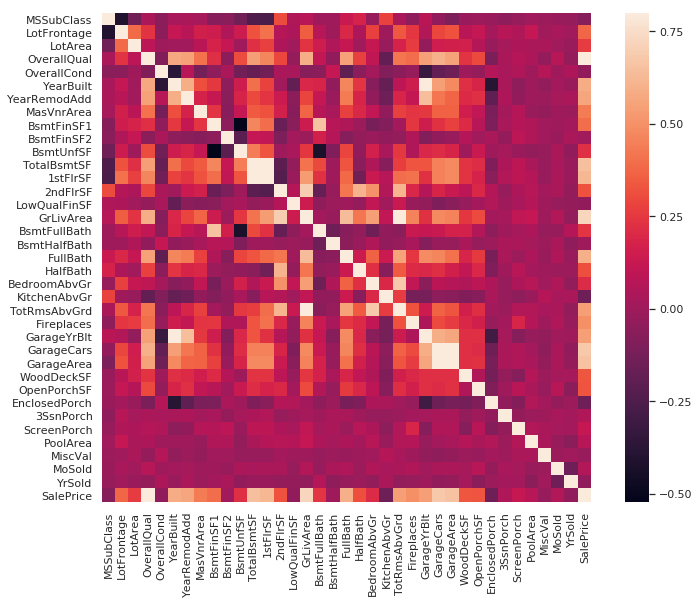

In [72]:
# Computing and plotting pairwise correlation of features from the train set
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

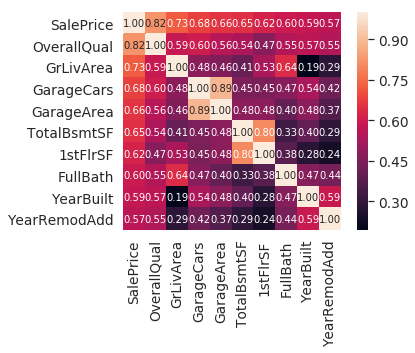

In [73]:
# Plotting pairwise correlation of the top 10 features from the train set
k = 10 #number of features to consider
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

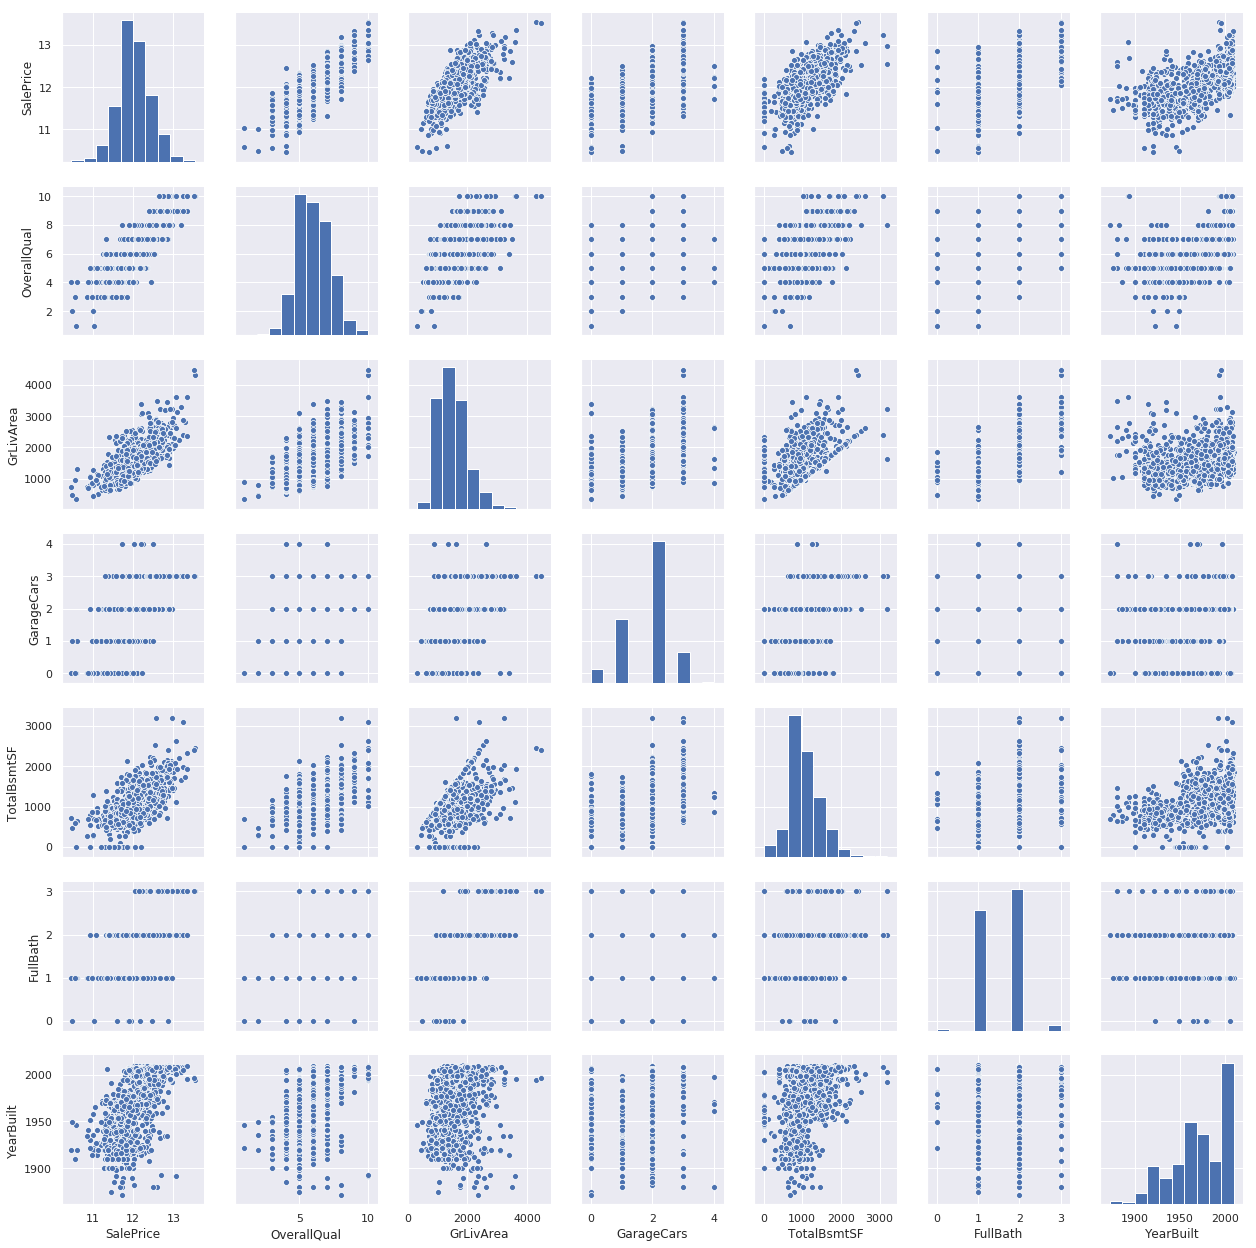

In [74]:
# Plotting pairwise relationships scatterplot among some of the features in a train set
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], height = 2.5)
plt.show();


In [75]:
all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        80.0
8        51.0
9        50.0
10       70.0
11       85.0
12       72.0
13       91.0
14       73.0
15       51.0
16       73.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       72.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
2887     50.0
2888     75.0
2889     69.0
2890     50.0
2891     60.0
2892     41.0
2893     44.0
2894     69.0
2895     65.0
2896     70.0
2897    140.0
2898     82.0
2899     82.0
2900     95.0
2901     88.0
2902    125.0
2903     78.0
2904     41.0
2905     58.0
2906     74.0
2907     21.0
2908     21.0
2909     80.0
2910     21.0
2911     21.0
2912     21.0
2913     21.0
2914    160.0
2915     62.0
2916     74.0
Name: LotFrontage, Length: 2917, dtype: float64

In [76]:
# Replacing all the NaN/NA values from some of the features with 'None'
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())) # grouping Neighborhood with linear feet of street connected to property and filling the NaN/NA values with median

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None') # Replacing all the NaN/NA values from some of the features with 'None'
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0) # Replacing all the NaN/NA values from some of the features with zero
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0) # Replacing all the NaN/NA values from some of the features with zero  

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None') # Replacing all the NaN/NA values from some of the features with 'None'
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None") # Replacing all the NaN/NA values from Masonry veneer type with 'None'
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0) # Replacing all the NaN/NA values from Masonry veneer area with zero
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0]) # replacing all the NaN/NA values from zoning classification of the sale with one of the mode
all_data = all_data.drop(['Utilities'], axis=1) # droping the Utilities column
all_data["Functional"] = all_data["Functional"].fillna("Typ") # replacing all the NaN/NA values from home functionality with Typical Functionality
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0]) # replacing all the NaN/NA values from Electrical system with one of the mode
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0]) # replacing all the NaN/NA values from Kitchen quality with one of the mode
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0]) # replacing all the NaN/NA values from Exterior covering on house with one of the mode
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0]) # replacing all the NaN/NA values from Exterior covering on house (if more than one material) with one of the mode
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0]) # replacing all the NaN/NA values from Type of sale with one of the mode
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None") # replacing all the NaN/NA values from MSSubClass with one of the mode

In [77]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [78]:
# Changing the type of data from integer to object
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str) 


# Changing the data type of "overall condition of the house" into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

# Changing the data type of "Year and month sold" into a categorical variable
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [79]:
from sklearn.preprocessing import LabelEncoder # import label encoder from scikit-learn 
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold') # features on which to perform label encoding

# Applying LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# Printing the dimensions of the concatenated dataset     
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [80]:
# Adding total square feet area from basement, 1st floor, and 2nd floor into a single feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [81]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index # extracting the numerical features

# Checking the skew of all the numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [82]:
skewness = skewness[abs(skewness) > 0.75] # applying boxcox transformation to features with skewness > 0.75
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    

There are 59 skewed numerical features to Box Cox transform


In [83]:
all_data = pd.get_dummies(all_data) # Convert categorical variable into dummy/indicator variables
print(all_data.shape)

(2917, 220)


In [84]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [85]:
y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [86]:
# 1st Model
from sklearn.linear_model import LinearRegression # importing module from scikit-learn for Ordinary least squares Linear Regression
from sklearn.metrics import mean_squared_error # importing module from scikit-learn for Mean squared error regression loss
from sklearn.preprocessing import StandardScaler # importing module from scikit-learn for standardizing features by removing the mean and scaling to unit variance
from sklearn.pipeline import Pipeline # importing module from scikit-learn for sequentially applying a list of transforms and a final estimator

scaler = StandardScaler() # initializing standard scaler
train_std = scaler.fit_transform(train) # standardizing train set features by removing the mean and scaling to unit variance 

lin_reg = LinearRegression() # initializing linear regression module
lin_reg.fit(train_std, y_train) # fitting linear regression on the scaled train set and train labels 

house_price_predictions = lin_reg.predict(train_std) # predicting House Sale Price using the linear regression on the train set data 
lin_mse = mean_squared_error(y_train, house_price_predictions) # computing mean squared error regression loss on the predicted house sale prices
lin_rmse = np.sqrt(lin_mse) # computing the root mean squared error regression loss on the predicted house sale prices
lin_rmse # displaying root mean squared error regression loss

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.09495659813678843

In [87]:
from sklearn.tree import DecisionTreeRegressor # importing decision tree regressor from scikit-learn

tree_reg = DecisionTreeRegressor(random_state=42) # initializing decision tree regressor
tree_reg.fit(train_std, y_train) # fitting decision tree regressor on the scaled train set and train labels 

house_price_predictions = tree_reg.predict(train_std) # predicting House Sale Price using the decision tree regression on the train set data 
tree_reg_mse = mean_squared_error(y_train, house_price_predictions) # computing mean squared error regression loss on the predicted house sale prices
tree_reg_rmse = np.sqrt(lin_mse) # computing the root mean squared error regression loss on the predicted house sale prices
tree_reg_rmse # displaying root mean squared error regression loss

0.09495659813678843

In [88]:
from sklearn.ensemble import RandomForestRegressor # importing random forest regressor from scikit-learn

random_forest_reg = RandomForestRegressor(random_state=42) # initializing forest regressor
random_forest_reg.fit(train_std, y_train) # fitting forest regressor on the scaled train set and train labels 

house_price_predictions = random_forest_reg.predict(train_std) # predicting House Sale Price using the forest regressor on the train set data 
random_forest_reg_mse = mean_squared_error(y_train, house_price_predictions) # computing mean squared error regression loss on the predicted house sale prices
random_forest_reg_rmse = np.sqrt(lin_mse) # computing the root mean squared error regression loss on the predicted house sale prices
random_forest_reg_rmse # displaying root mean squared error regression loss

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.09495659813678843

In [89]:
from sklearn.ensemble import AdaBoostRegressor # importing adaBoost regressor from scikit-learn

ada_tree_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), # initializing adaBoost regressor using a Decision Tree Regressor with a maximum depth of 4 and 300 maximum number of estimators
                          n_estimators=300, random_state=42)

ada_tree_reg.fit(train_std, y_train) # fitting adaBoost regressor on the scaled train set and train labels 

house_price_predictions = ada_tree_reg.predict(train_std) # predicting House Sale Price using the adaBoost regressor on the train set data 
ada_tree_reg_mse = mean_squared_error(y_train, house_price_predictions) # computing mean squared error regression loss on the predicted house sale prices
ada_tree_reg_rmse = np.sqrt(lin_mse) # computing the root mean squared error regression loss on the predicted house sale prices
ada_tree_reg_rmse # displaying root mean squared error regression loss

0.09495659813678843

In [90]:
def display_scores(scores): # function to display scores and the mean and standard deviation of the scores
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [91]:
from sklearn.model_selection import cross_val_score # importing cross-validation from scikit-learn for evaluation

scores = cross_val_score(ada_tree_reg, train_std, y_train,
                         scoring="neg_mean_squared_error", cv=10) # initializing cross-validation using the aforementioned adaBoost regressor and 10 fold cross-validation strategy
ada_tree_reg_scores = np.sqrt(-scores) # computing negative root mean squared error regression loss on the predicted house sale prices
display_scores(ada_tree_reg_scores) # displaying scores using the function above

Scores: [0.15354166 0.15363034 0.14495091 0.14856867 0.16210237 0.13635497
 0.14895339 0.1309636  0.14187811 0.15854841]
Mean: 0.1479492415450747
Standard deviation: 0.009199910445565094


In [92]:
from sklearn.svm import SVR # importing Support Vector Regressor from scikit-learn

svm_reg = SVR(kernel="linear") # initializing Support Vector Regressor with a linear kernel
svm_reg.fit(train_std, y_train) # training Support Vector Regressor on the scaled train set and train labels 
housing_predictions = svm_reg.predict(train_std) # predicting House Sale Price using the Support Vector Regressor on the train set data 
svm_reg_mse = mean_squared_error(y_train, housing_predictions) # computing mean squared error regression loss on the predicted house sale prices
svm_reg_rmse = np.sqrt(lin_mse) # computing the root mean squared error regression loss on the predicted house sale prices
svm_reg_rmse # displaying root mean squared error regression loss

0.09495659813678843

In [93]:
from sklearn.model_selection import GridSearchCV # importing Grid Search module from scikit-learn for performing exhaustive search over specified parameter values for an estimator

param_grid = [
    # trying combinations of hyperparameters with bootstrap set as False
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

random_forest_reg = RandomForestRegressor(random_state=42) # initializing Random Forest Regressor 
# training across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True) # initialising Gridsearch with the Random Forest Regressor and negative mean squared error as scoring metric; using 5-fold cross validation
grid_search.fit(train_std, y_train) # performing exhaustive search over specified parameter values which gives the minimum negative mean squared error for a Random Forest Regressor 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [94]:
grid_search.best_params_ # Parameter setting that gave the best results on the negative mean squared error on the train data set

{'max_features': 8, 'n_estimators': 30}

In [95]:
grid_search.best_estimator_ # Estimator that gave the best results on the negative mean squared error on the train data set

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [96]:
grid_search.cv_results_ # Cross validation results of the different set of parameters

{'mean_fit_time': array([0.00753655, 0.01865845, 0.04947677, 0.00866117, 0.02080703,
        0.05601363, 0.00877738, 0.02286634, 0.06265497, 0.01005769,
        0.02554102, 0.06984048, 0.00901933, 0.02454309, 0.00899415,
        0.02533841, 0.01008968, 0.02747617]),
 'std_fit_time': array([0.00062097, 0.00058557, 0.00079929, 0.00046835, 0.00054433,
        0.00046559, 0.00038412, 0.00079812, 0.00050429, 0.00039391,
        0.00089031, 0.00080111, 0.00013535, 0.00096813, 0.00036546,
        0.00091208, 0.00027475, 0.00051977]),
 'mean_score_time': array([0.00094991, 0.00181866, 0.00429506, 0.00096879, 0.00179367,
        0.00416932, 0.00098534, 0.00182657, 0.00433087, 0.00109043,
        0.00188208, 0.0041883 , 0.00101433, 0.00204597, 0.00093102,
        0.00198717, 0.00099912, 0.00223889]),
 'std_score_time': array([4.94354815e-05, 4.01314492e-05, 1.56773543e-04, 3.48426057e-05,
        5.09726209e-05, 6.51022613e-05, 6.48790182e-05, 6.24145779e-05,
        1.31811367e-04, 7.60872246e-

In [97]:
cvres = grid_search.cv_results_ # Displaying mean test score of different combinations of maximum features and parameters
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.22477562590099442 {'max_features': 2, 'n_estimators': 3}
0.1787655130726615 {'max_features': 2, 'n_estimators': 10}
0.16608977340102668 {'max_features': 2, 'n_estimators': 30}
0.20654274110205162 {'max_features': 4, 'n_estimators': 3}
0.16869483642983205 {'max_features': 4, 'n_estimators': 10}
0.1578290386483464 {'max_features': 4, 'n_estimators': 30}
0.19665611774483288 {'max_features': 6, 'n_estimators': 3}
0.1649823665603834 {'max_features': 6, 'n_estimators': 10}
0.15251324017789797 {'max_features': 6, 'n_estimators': 30}
0.19222393232792825 {'max_features': 8, 'n_estimators': 3}
0.15973512466385179 {'max_features': 8, 'n_estimators': 10}
0.14750955651522496 {'max_features': 8, 'n_estimators': 30}
0.21295333087877022 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.17383918806829174 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.20559828062374713 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.1664063929567208 {'bootstrap': False, 'max_feat

In [98]:
feature_importances = grid_search.best_estimator_.feature_importances_ # evaluating the importance of features from the house price dataset
feature_importances

array([3.95368000e-02, 1.03836096e-02, 9.62358910e-05, 9.04206755e-04,
       7.24894232e-03, 2.25731360e-03, 6.94923372e-03, 2.36364017e-02,
       1.32987256e-03, 5.45729985e-03, 1.59768714e-03, 3.75034572e-03,
       4.35669780e-04, 1.07067683e-02, 7.40200547e-03, 5.85082666e-03,
       2.35021666e-03, 3.51927957e-03, 1.59845849e-02, 2.38048075e-03,
       5.09758023e-03, 1.04763691e-02, 4.22437459e-02, 1.73308562e-03,
       3.17348343e-02, 2.75958468e-02, 7.98922746e-03, 1.64556561e-02,
       5.12535698e-03, 1.43372534e-02, 6.44290398e-02, 7.13006621e-03,
       1.86517392e-02, 1.08966006e-03, 1.55542172e-02, 8.18848771e-04,
       2.06927502e-02, 1.54793036e-02, 3.00679094e-03, 1.01537877e-04,
       7.90978309e-03, 8.51211057e-03, 6.19914862e-04, 5.01244991e-03,
       1.09180237e-02, 8.00182579e-03, 8.06899407e-02, 2.46916451e-03,
       3.73474031e-04, 2.32689646e-04, 1.05756308e-03, 1.09413667e-04,
       2.19788232e-02, 5.21366186e-02, 9.80927440e-03, 2.62223205e-02,
      

In [99]:
final_model = grid_search.best_estimator_ # selecting the random forest regressor model with the best combination of parameters

final_predictions = final_model.predict(train_std) # predicting House Sale Price using the best random forest regressor model on the train set data 

final_mse = mean_squared_error(y_train, final_predictions) # computing mean squared error regression loss on the predicted house sale prices
final_rmse = np.sqrt(final_mse) # computing the root mean squared error regression loss on the predicted house sale prices
final_rmse # displaying root mean squared error regression loss

0.06027068624903356

In [100]:
from sklearn.model_selection import RandomizedSearchCV # importing module from scikit-learn for performing Randomized search on hyper parameters
from scipy.stats import randint # importing module from scipy to generate discrete random values

param_distribs = {
        # trying combinations of hyperparameters
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

random_forest_reg = RandomForestRegressor(random_state=42) # initializing Random Forest Regressor 
rnd_search = RandomizedSearchCV(random_forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42) # initialising Randomized Search with the Random Forest Regressor and negative mean squared error as scoring metric; using 5-fold cross validation and 10 parameter settings that are sampled
rnd_search.fit(train_std, y_train) # performing random search over specified parameter values which gives the minimum negative mean squared error for a Random Forest Regressor 

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa48bde3b38>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa4800a6400>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=0)

In [101]:
cvres = rnd_search.cv_results_ # Displaying mean test score of different combinations of maximum features and parameters
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.1466885106187354 {'max_features': 7, 'n_estimators': 180}
0.16178301819494023 {'max_features': 5, 'n_estimators': 15}
0.16084228133551218 {'max_features': 3, 'n_estimators': 72}
0.1604064862248478 {'max_features': 5, 'n_estimators': 21}
0.14718435728677323 {'max_features': 7, 'n_estimators': 122}
0.16058166083091974 {'max_features': 3, 'n_estimators': 75}
0.1601598275936064 {'max_features': 3, 'n_estimators': 88}
0.15274948840317715 {'max_features': 5, 'n_estimators': 100}
0.1595111178400484 {'max_features': 3, 'n_estimators': 150}
0.21540022977152665 {'max_features': 5, 'n_estimators': 2}


In [102]:
feature_importances = rnd_search.best_estimator_.feature_importances_ # evaluating the importance of features from the house price dataset
feature_importances

array([3.26779667e-02, 1.87339793e-02, 2.83656399e-04, 2.10569359e-03,
       7.15712581e-03, 2.08836283e-03, 5.88510572e-03, 2.22693149e-02,
       1.62092421e-03, 6.22997586e-03, 1.68379105e-03, 4.93039833e-03,
       5.91805871e-04, 1.79535429e-02, 9.21561718e-03, 8.23391035e-03,
       2.39044510e-03, 2.30496210e-03, 2.94184930e-02, 2.18928324e-03,
       1.01723912e-02, 1.64613805e-02, 3.19430845e-02, 1.64472784e-03,
       3.24465770e-02, 2.82049251e-02, 7.11778118e-03, 1.19100475e-02,
       6.13738723e-03, 2.74575504e-02, 6.00145408e-02, 7.54360934e-03,
       1.65944279e-02, 1.88663456e-03, 2.80497546e-02, 1.46025375e-03,
       2.44461255e-02, 1.46234069e-02, 3.35717217e-03, 3.66011194e-04,
       1.00731292e-02, 1.16831358e-02, 6.10250723e-04, 5.16943470e-03,
       1.55941893e-02, 8.85198570e-03, 4.97978051e-02, 3.28427171e-03,
       2.07615057e-04, 3.88457564e-04, 1.70152905e-03, 2.04982729e-04,
       2.35347326e-02, 3.69191768e-02, 1.13293538e-02, 3.09152439e-02,
      

In [103]:
final_model = rnd_search.best_estimator_ # selecting the random forest regressor model with the best combination of parameters

final_predictions = final_model.predict(train_std) # predicting House Sale Price using the best random forest regressor model on the train set data 

final_mse = mean_squared_error(y_train, final_predictions) # computing mean squared error regression loss on the predicted house sale prices
final_rmse = np.sqrt(final_mse) # computing the root mean squared error regression loss on the predicted house sale prices
final_rmse # displaying root mean squared error regression loss

0.05378695951712957

In [104]:
from sklearn.linear_model import SGDRegressor # importing Stochastic Gradient Descent regressor module from scikit-learn
sgd_reg = SGDRegressor(max_iter=50, penalty='elasticnet', eta0=0.1, random_state=42) # initializing Stochastic Gradient Descent regressor with 50 maximum epochs, a learning rate of 0.1, and elasticnet as regularizing method 
sgd_reg.fit(train_std, y_train.ravel()) # training the Stochastic Gradient Descent regressor on the scaled train set and train labels 

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty='elasticnet', power_t=0.25,
       random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [105]:
# sgd_reg.intercept_, sgd_reg.coef_
final_predictions = sgd_reg.predict(train_std) # predicting House Sale Price using the Stochastic Gradient Descent regressor on the train set data 

sgd_reg_mse = mean_squared_error(y_train, final_predictions) # computing mean squared error regression loss on the predicted house sale prices
sgd_reg_rmse = np.sqrt(sgd_reg_mse) # computing root mean squared error regression loss on the predicted house sale prices
sgd_reg_rmse # displaying the mean squared error regression loss 

982475115721.7722

In [106]:
from sklearn.preprocessing import PolynomialFeatures # 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(train_std)

In [107]:
X_poly[0]

array([-0.81351088,  1.19603944, -0.12798756, ...,  0.00206186,
       -0.01763021,  0.1507498 ])

In [108]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(11.938429101149746,
 array([ 1.15947829e-02,  4.09549604e-03, -2.33360033e-05, ...,
        -3.39173900e-04,  9.19584556e-06,  4.56251764e-04]))

In [109]:
# sgd_reg.intercept_, sgd_reg.coef_
final_predictions = lin_reg.predict(X_poly)

lin_reg_mse = mean_squared_error(y_train, final_predictions)
lin_reg_rmse = np.sqrt(sgd_reg_mse)
lin_reg_rmse

982475115721.7722

In [110]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

# for degree in (300, 2, 1):
#     polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
#     std_scaler = StandardScaler()
#     lin_reg = LinearRegression()
#     polynomial_regression = Pipeline([
#             ("poly_features", polybig_features),
#             ("std_scaler", std_scaler),
#             ("lin_reg", lin_reg),
#         ])
#     polynomial_regression.fit(train_std, y_train)
#     final_predictions = polynomial_regression.predict(train_std)
#     polynomial_regression_mse = mean_squared_error(y_train, final_predictions)
#     polynomial_regression_rmse = np.sqrt(sgd_reg_mse)
#     polynomial_regression_rmse


In [111]:
# from sklearn.linear_model import Ridge
# ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
# ridge_reg.fit(train_std, y_train)

In [112]:
# final_predictions = polynomial_regression.predict(train_std)
# ridge_reg_mse = mean_squared_error(y_train, final_predictions)
# ridge_reg_rmse = np.sqrt(sgd_reg_mse)
# ridge_reg_rmse